In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import networkx as nx
import scipy.io

In [101]:
#Load files ig 

mat_path = r"Coactivation_matrix.mat"
mat_json = scipy.io.loadmat(mat_path)

In [103]:
#File to dictionary 

mat_dict = {k: v for k, v in mat_json.items() if k[0] != '_'}
df = pd.DataFrame(mat_dict['Coactivation_matrix'])

mat_dict

{'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484581, -5.09251101],
        [-4.53874539, 46.53874539,  3.06273063]])}

In [105]:
df

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


In [107]:
#Adj matrix en NetworkX
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

In [108]:
#Evil stuff: Sólo los nodos más conectados (Sólo dejar a cada nodo con su nodo de mayor peso)

for node in G.nodes():
    edges = G[node]
    if edges:
        vecinoMax = max(edges.items(), key=lambda x: x[1]['weight'])[0]
        for vecinos in list(edges.keys()):
            if vecinos != vecinoMax:
                G.remove_edge(node, vecinos)

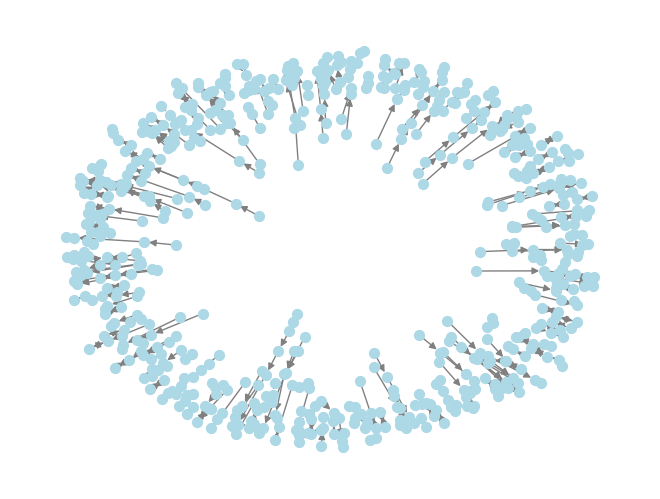

In [110]:
#Plot sin chords lol

nx.draw(G, node_color='lightblue', edge_color='gray', node_size=50)

In [112]:
#De adj a data frame, de data frame a numpy array lol

df_adj = nx.to_pandas_adjacency(G)
adj_matrix = df_adj.to_numpy()

In [113]:
graph_list = list(G.adjacency())
graph_list

[(0, {1: {'weight': 0.16071428571428573}}),
 (1, {0: {'weight': 0.16071428571428573}}),
 (2, {3: {'weight': 0.22419928825622776}}),
 (3, {2: {'weight': 0.22419928825622776}}),
 (4, {84: {'weight': 0.1625615763546798}}),
 (5, {12: {'weight': 0.21367521367521367}}),
 (6, {20: {'weight': 0.17405063291139242}}),
 (7, {154: {'weight': 0.2161654135338346}}),
 (8, {11: {'weight': 0.23469387755102042}}),
 (9, {23: {'weight': 0.2523809523809524}}),
 (10, {15: {'weight': 0.14093959731543623}}),
 (11, {8: {'weight': 0.23469387755102042}}),
 (12, {5: {'weight': 0.21367521367521367}}),
 (13, {9: {'weight': 0.10328638497652583}}),
 (14, {21: {'weight': 0.16666666666666666}}),
 (15, {498: {'weight': 0.1619047619047619}}),
 (16, {19: {'weight': 0.283495145631068}}),
 (17, {15: {'weight': 0.11510791366906475}}),
 (18, {12: {'weight': 0.17083333333333334}}),
 (19, {16: {'weight': 0.283495145631068}}),
 (20, {6: {'weight': 0.17405063291139242}}),
 (21, {449: {'weight': 0.171875}}),
 (22, {431: {'weight':

In [114]:
df_adj

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.160714,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.224199,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.224199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.196721,0.0,0.0,0.0
634,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.196721,0.000000,0.0,0.0,0.0
635,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.111650,0.0,0.0,0.0
636,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [115]:
#Chords!

x = mat_dict['Coord'][:, 0] 
y = mat_dict['Coord'][:, 1] 
z = mat_dict['Coord'][:, 2]  

In [116]:
#Sin esto no se plotea chido 

pesoMaximo = np.max(adj_matrix) if np.max(adj_matrix) > 0 else 1  #Evita división sobre '
pesosNormalizados = adj_matrix / pesoMaximo  #Pesos sólo del 0 al 1
colormap = cm.viridis 

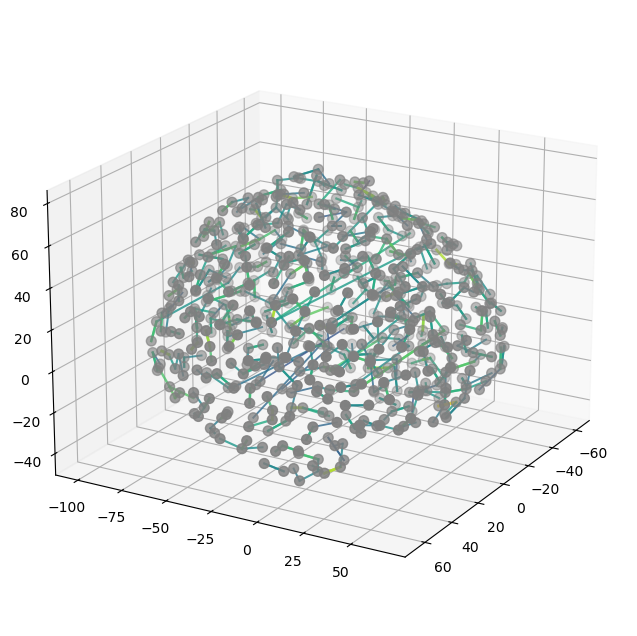

In [126]:
#Figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

#Plot nodes
ax.scatter3D(x, y, z, color='gray', s=50)

#Plot edges
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        weight = adj_matrix[i, j]
        if weight > 0:  #Sólo non zero edges
            color = colormap(pesosNormalizados[i, j])  #Color of edges according to weight
            ax.plot(
                [x[i], x[j]],  
                [y[i], y[j]], 
                [z[i], z[j]],  
                color=color, alpha=0.8, lw=1 + 3 * weight  
            )

#Angle
ax.view_init(elev=20., azim=30)
